In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [435]:
df = pd.read_csv('/content/train_dataset_final1.csv')

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [437]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,25247.0,17640.000000,7288.325459,5017.00,11328.500,17640.00,23951.500,30263.00
marriage,25247.0,1.551907,0.522629,0.00,1.000,2.00,2.000,3.00
sex,25247.0,0.604111,0.489050,0.00,0.000,1.00,1.000,1.00
education,25247.0,1.852101,0.797379,0.00,1.000,2.00,2.000,6.00
LIMIT_BAL,25247.0,168342.060443,129892.784807,10000.00,50000.000,140000.00,240000.000,1000000.00
age,25121.0,35.438199,9.174998,21.00,28.000,34.00,41.000,79.00
pay_0,25247.0,-0.042857,1.099315,-2.00,-1.000,0.00,0.000,8.00
pay_2,25247.0,-0.159544,1.173990,-2.00,-1.000,0.00,0.000,8.00
pay_3,25247.0,-0.190359,1.172636,-2.00,-1.000,0.00,0.000,8.00
pay_4,25247.0,-0.241415,1.146753,-2.00,-1.000,0.00,0.000,7.00


In [438]:
df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [439]:
df.duplicated().sum()

np.int64(0)

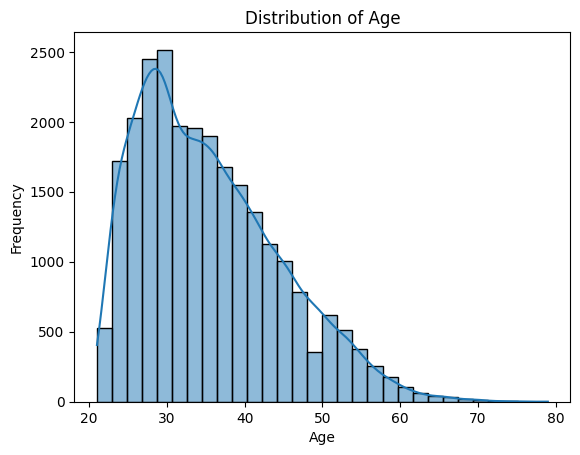

In [440]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [441]:
print("Skewness:", df['age'].skew())

Skewness: 0.7384976486065989


In [442]:
median_age = df['age'].median()
print("Median Age:", median_age)
df['age'].fillna(median_age, inplace=True)

Median Age: 34.0


In [443]:
df.head(15)

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
5,5022,1,1,1,80000,35.0,-1,2,-1,-1,...,3294.93,0.03,3722.62,890.98,661.97,3294.84,1087.51,1946.50,0.83,0
6,5023,1,0,2,200000,37.0,-1,-1,0,-1,...,10712.01,19312.98,9455.13,15306.21,7055.30,10700.16,12388.83,15185.33,0.81,0
7,5024,3,1,2,50000,24.0,0,0,0,0,...,5651.27,1600.15,6207.28,1464.87,2199.89,1000.26,3000.16,21055.33,0.12,0
8,5025,1,1,3,50000,44.0,0,0,0,0,...,9001.04,1761.95,2311.19,2200.21,176.18,180.19,9769.14,35039.67,0.08,0
9,5026,2,1,1,440000,34.0,0,-1,-1,-2,...,11350.05,8998.93,0.00,0.00,10960.93,502.87,448.09,9569.17,0.36,0


In [444]:
df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [445]:
df['next_month_default'].value_counts()

,count
next_month_default,
0,20440
1,4807


In [446]:
print(df['Customer_ID'].duplicated().sum())

0


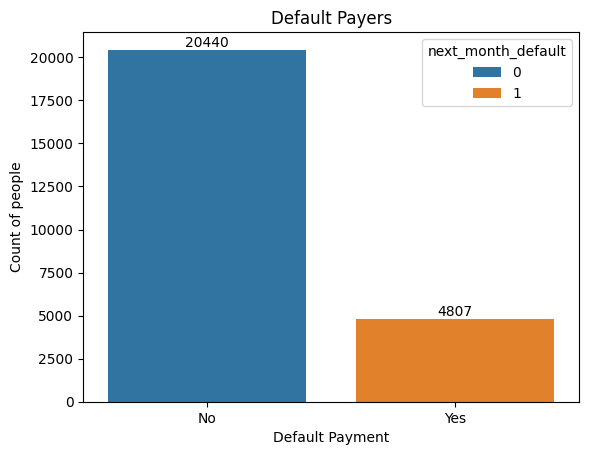

In [447]:
default_count = sns.countplot(data = df , x = 'next_month_default' , hue = 'next_month_default')
default_count.set_title('Default Payers')
default_count.set_xlabel('Default Payment')
default_count.set_ylabel('Count of people')
default_count.set_xticks([0, 1])
default_count.set_xticklabels(['No', 'Yes'])
for container in default_count.containers:
    default_count.bar_label(container)
plt.show()

The percentage of defaulters in the data is 19.039885927040835 %


[]

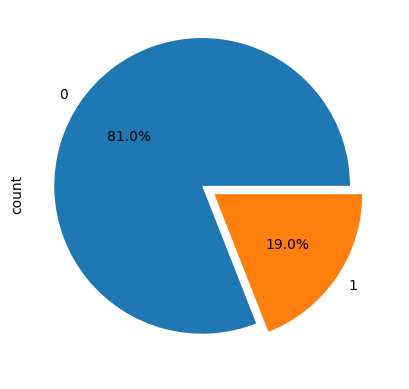

In [448]:
perc_default = df.next_month_default.sum() / len(df.next_month_default)
print(f'The percentage of defaulters in the data is {perc_default*100} %')
df['next_month_default'].value_counts().plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.plot()

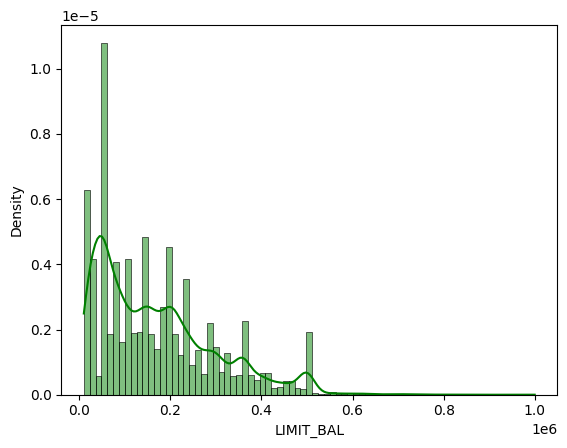

In [449]:
sns.histplot(df['LIMIT_BAL'], kde=True, stat="density", color='green')
plt.show()

In [450]:
gender_counts = df['sex'].value_counts()
gender_counts

,count
sex,
1,15252
0,9995


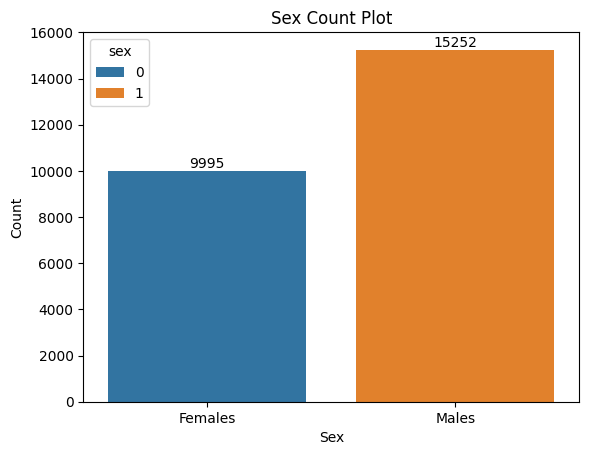

In [451]:
sex_count = sns.countplot(data = df , x='sex' , hue = 'sex' )
sex_count.set_title('Sex Count Plot')
sex_count.set_xlabel('Sex')
sex_count.set_ylabel('Count')
sex_count.set_xticks([0, 1])
sex_count.set_xticklabels(['Females', 'Males'])
for container in sex_count.containers:
    sex_count.bar_label(container)
plt.show()

In [452]:
grouped_counts = df.groupby(['next_month_default','sex'])['sex'].count()
print(grouped_counts)

next_month_default  sex
0                   0       7910
                    1      12530
1                   0       2085
                    1       2722
Name: sex, dtype: int64


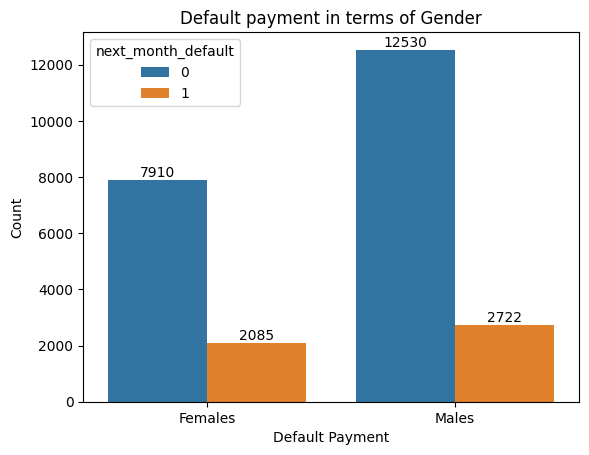

In [453]:
sex_count = sns.countplot(x='sex', hue='next_month_default', data=df)
sex_count.set_title('Default payment in terms of Gender')
sex_count.set_xlabel('Default Payment')
sex_count.set_ylabel('Count')
sex_count.set_xticks([0, 1])
sex_count.set_xticklabels(['Females', 'Males'])
for container in sex_count.containers:
    sex_count.bar_label(container)
plt.show()

Total Males = 15252

Total Females = 9995

 total males defaulted = 2722/15252 = 17.8%
  
total females defaulted = 2085/995 = 20.86%

In [454]:
df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
5,253
4,116
6,44
0,14


In [455]:
df['education'] = df['education'].replace(to_replace=[0, 5, 6], value=4)
df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
4,427


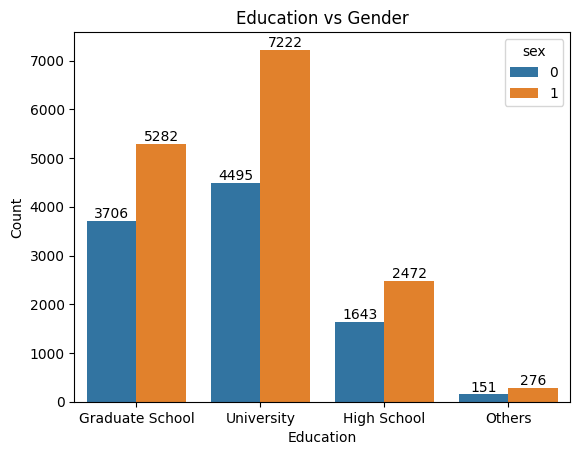

In [456]:
sex_count = sns.countplot(data = df , x = 'education' , hue = 'sex')
sex_count.set_title('Education vs Gender')
sex_count.set_xlabel('Education')
sex_count.set_ylabel('Count')
sex_count.set_xticks([0, 1, 2, 3])
sex_count.set_xticklabels(['Graduate School', 'University', 'High School', 'Others'])
for container in sex_count.containers:
    sex_count.bar_label(container)
plt.show()

In [457]:
grouped_counts = df.groupby(['next_month_default','education'])['education'].count()
print(grouped_counts)

next_month_default  education
0                   1            7534
                    2            9267
                    3            3238
                    4             401
1                   1            1454
                    2            2450
                    3             877
                    4              26
Name: education, dtype: int64


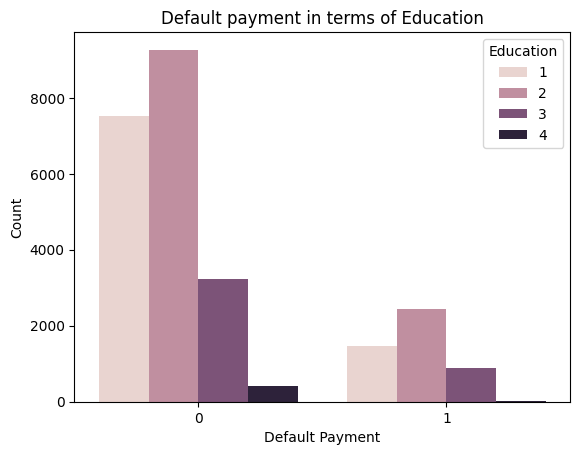

In [458]:
# Create the countplot with grouping using 'hue'
sns.countplot(x='next_month_default', hue='education', data=df)

# Customize the plot
plt.title('Default payment in terms of Education')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.legend(title='Education')

# Show the plot
plt.show()

In [459]:
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,273
0,53


In [460]:
#Marital status (1=married, 2=single, 3=others)

#Assign unknown categories to other.
df['marriage'] = df['marriage'].replace(to_replace=[0], value=3)
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,326


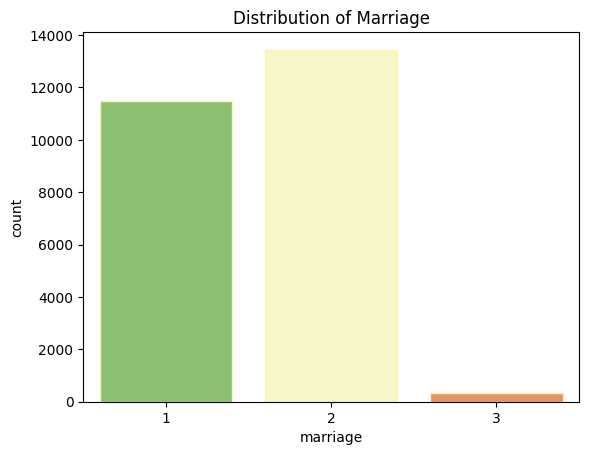

In [461]:
sns.countplot(x='marriage', data=df,palette='RdYlGn_r', edgecolor=sns.color_palette("YlOrBr"))
plt.title('Distribution of Marriage')
plt.show()

In [462]:
grouped_counts = df.groupby(['next_month_default','marriage'])['marriage'].count()
print(grouped_counts)

next_month_default  marriage
0                   1            9141
                    2           11037
                    3             262
1                   1            2339
                    2            2404
                    3              64
Name: marriage, dtype: int64


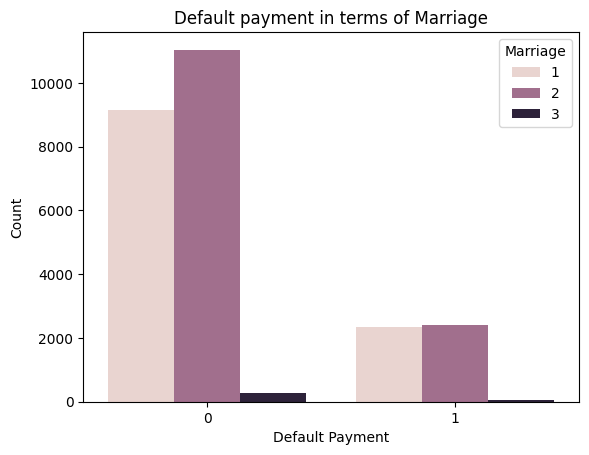

In [463]:
# Create the countplot with grouping using 'hue'
sns.countplot(x='next_month_default', hue='marriage', data=df)

# Customize the plot
plt.title('Default payment in terms of Marriage')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.legend(title='Marriage')

# Show the plot
plt.show()

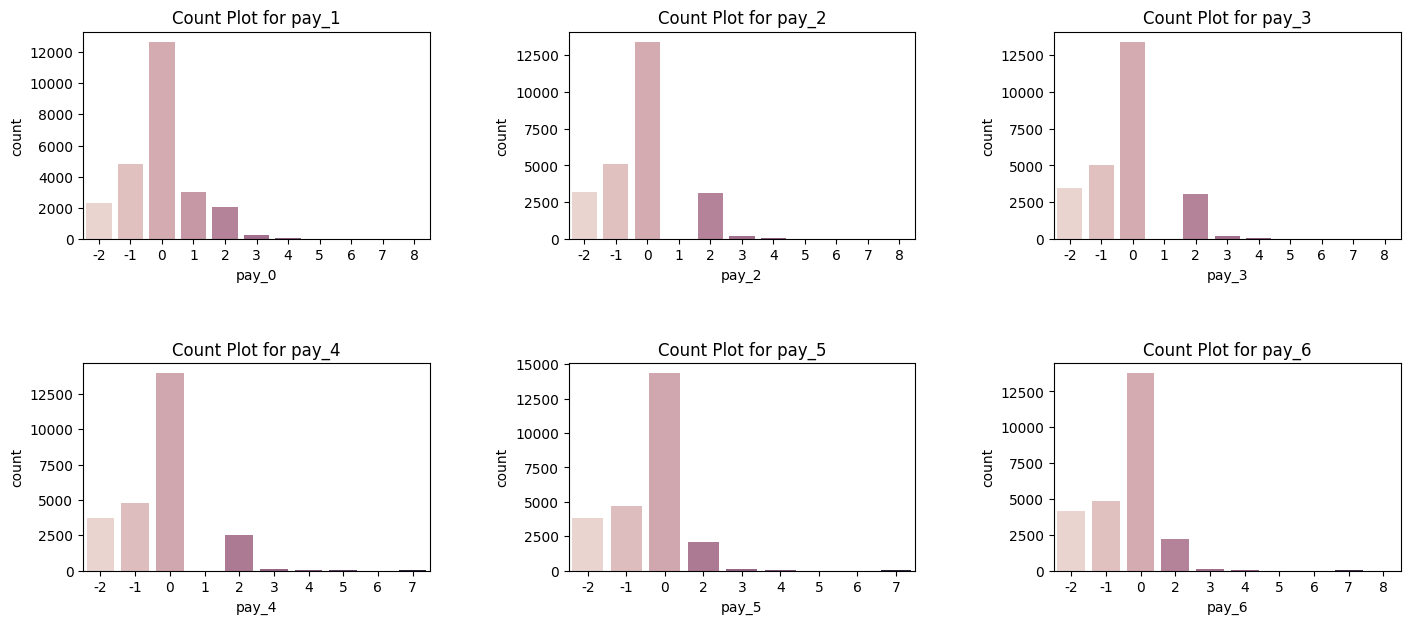

In [464]:
fig, axes=plt.subplots(2, 3, figsize=(17, 7))
axes=axes.flatten()
for i in range(6, 12):
    limit_count = sns.countplot(data=df, x=df.columns[i], ax=axes[i-6], hue=df.columns[i])
    limit_count.set_title(f'Count Plot for pay_{i-5}')
    limit_count.legend().remove()
plt.subplots_adjust(hspace=0.6, wspace=0.4)

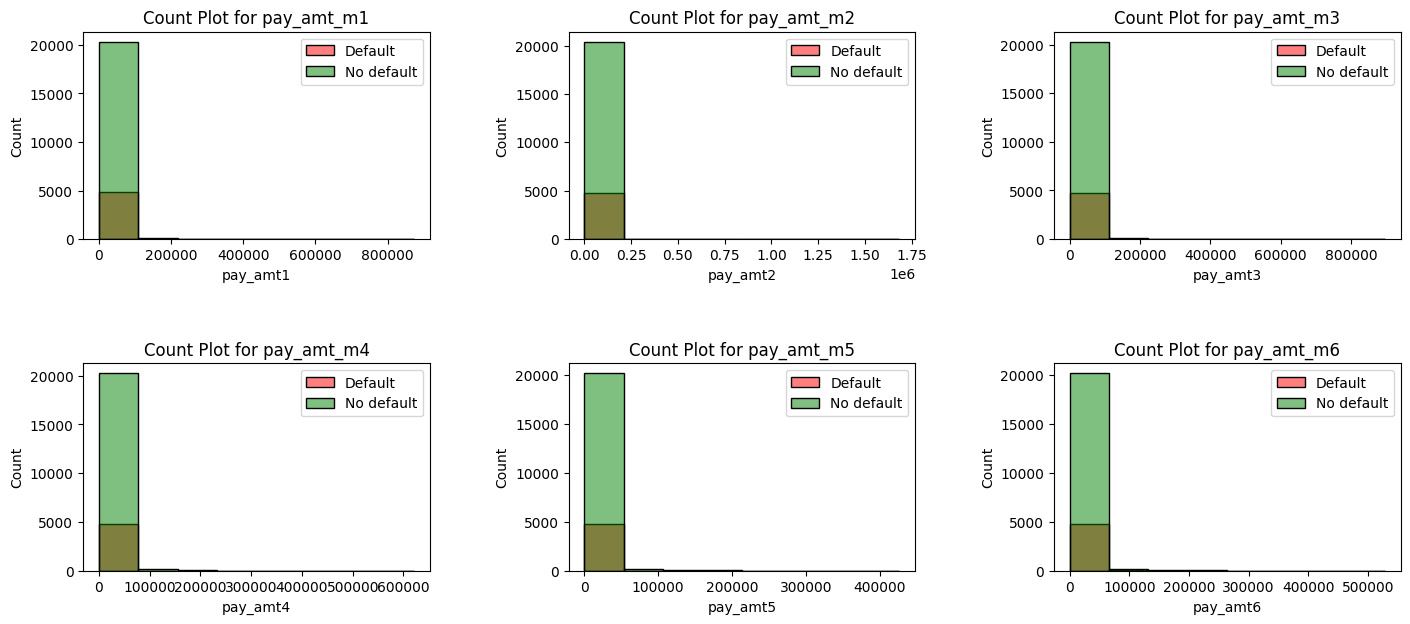

In [465]:
fig, axes=plt.subplots(2, 3, figsize=(17, 7))
axes=axes.flatten()
for i in range(18, 24):
    limit_count = sns.histplot(data=df, x=df.columns[i], bins=8, ax=axes[i-18], hue='next_month_default', palette=['green', 'red'])
    limit_count.set_title(f'Count Plot for pay_amt_m{i-17}')
    limit_count.legend(labels=['Default', 'No default'])
plt.subplots_adjust(hspace=0.6, wspace=0.4)

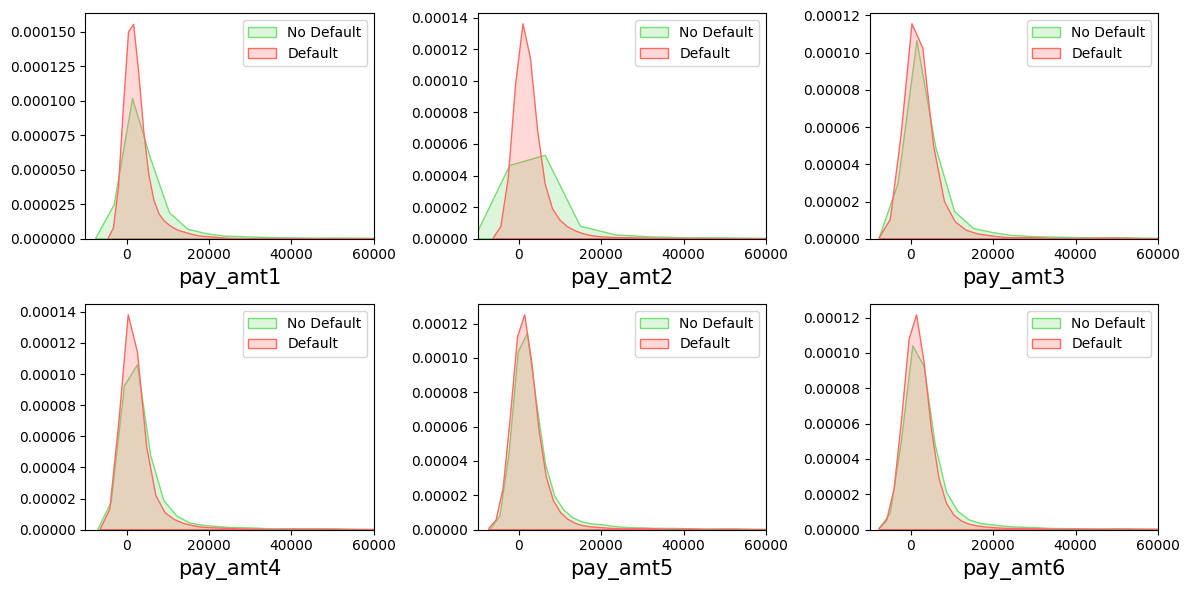

In [466]:
PAY_AMT_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
plt.figure(figsize=(12,6))

for i,col in enumerate(PAY_AMT_cols):
    plt.subplot(2,3,i + 1)
    sns.kdeplot(df.loc[(df['next_month_default'] == 0), col], label = 'No Default', shade = True,color='#77DD76')
    sns.kdeplot(df.loc[(df['next_month_default'] == 1), col], label = 'Default', shade = True, color='#FF6962')
    plt.xlim(-10000,60000)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

#plt.savefig('images/continuousPAYAMT.svg')
plt.show()

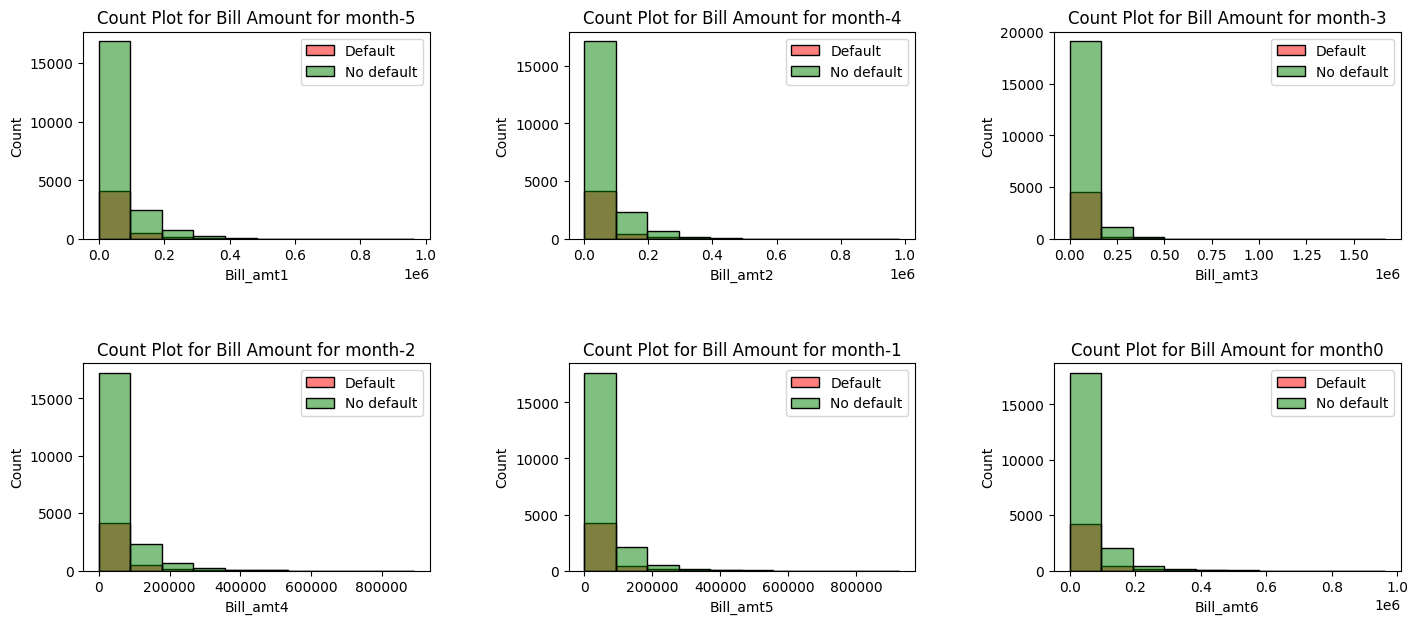

In [467]:
fig, axes=plt.subplots(2, 3, figsize=(17, 7))
axes=axes.flatten()
for i in range(12, 18):
    limit_count = sns.histplot(data=df, x=df.columns[i], ax=axes[i-12], hue='next_month_default', palette=['green', 'red'], bins=10)
    limit_count.set_title(f'Count Plot for Bill Amount for month{i-17}')
    limit_count.legend(labels=['Default', 'No default'])
plt.subplots_adjust(hspace=0.6, wspace=0.4)

In [468]:
categorical=['Customer_ID', 'marriage', 'sex', 'education', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'next_month_default']
all_cols=list(df.columns[:])
numerical=[x for x in all_cols if x not in categorical]
df[categorical] = df[categorical].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_ID         25247 non-null  category
 1   marriage            25247 non-null  category
 2   sex                 25247 non-null  category
 3   education           25247 non-null  category
 4   LIMIT_BAL           25247 non-null  int64   
 5   age                 25247 non-null  float64 
 6   pay_0               25247 non-null  category
 7   pay_2               25247 non-null  category
 8   pay_3               25247 non-null  category
 9   pay_4               25247 non-null  category
 10  pay_5               25247 non-null  category
 11  pay_6               25247 non-null  category
 12  Bill_amt1           25247 non-null  float64 
 13  Bill_amt2           25247 non-null  float64 
 14  Bill_amt3           25247 non-null  float64 
 15  Bill_amt4           25247 non-null  

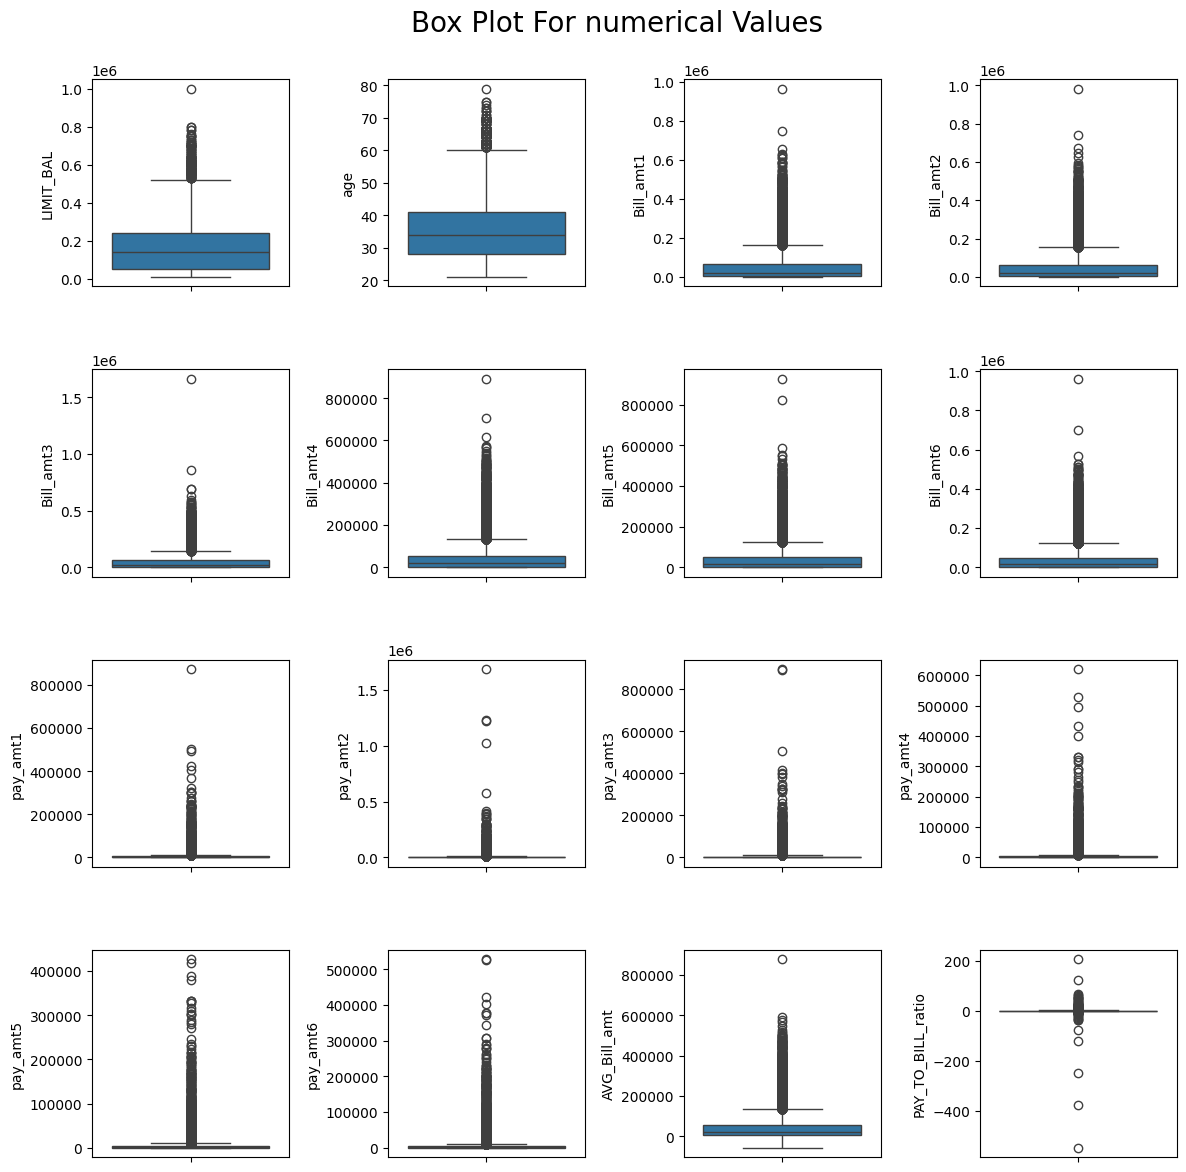

In [469]:
fig, axes=plt.subplots(4, 4, figsize=(14, 14))
axes=axes.flatten()
plt.suptitle('Box Plot For numerical Values', fontsize=20, y=0.93)
for i, col in enumerate(numerical):
    box=sns.boxplot(df[col], ax=axes[i])
plt.subplots_adjust(hspace=0.4, wspace=0.5)

In [470]:
new_df = df.copy()

In [471]:
for column in numerical:
    column_data = new_df[column]

    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR



    median = column_data.median()

    column_data[(column_data < lower) | (column_data > upper)] = median
    new_df[column]=column_data

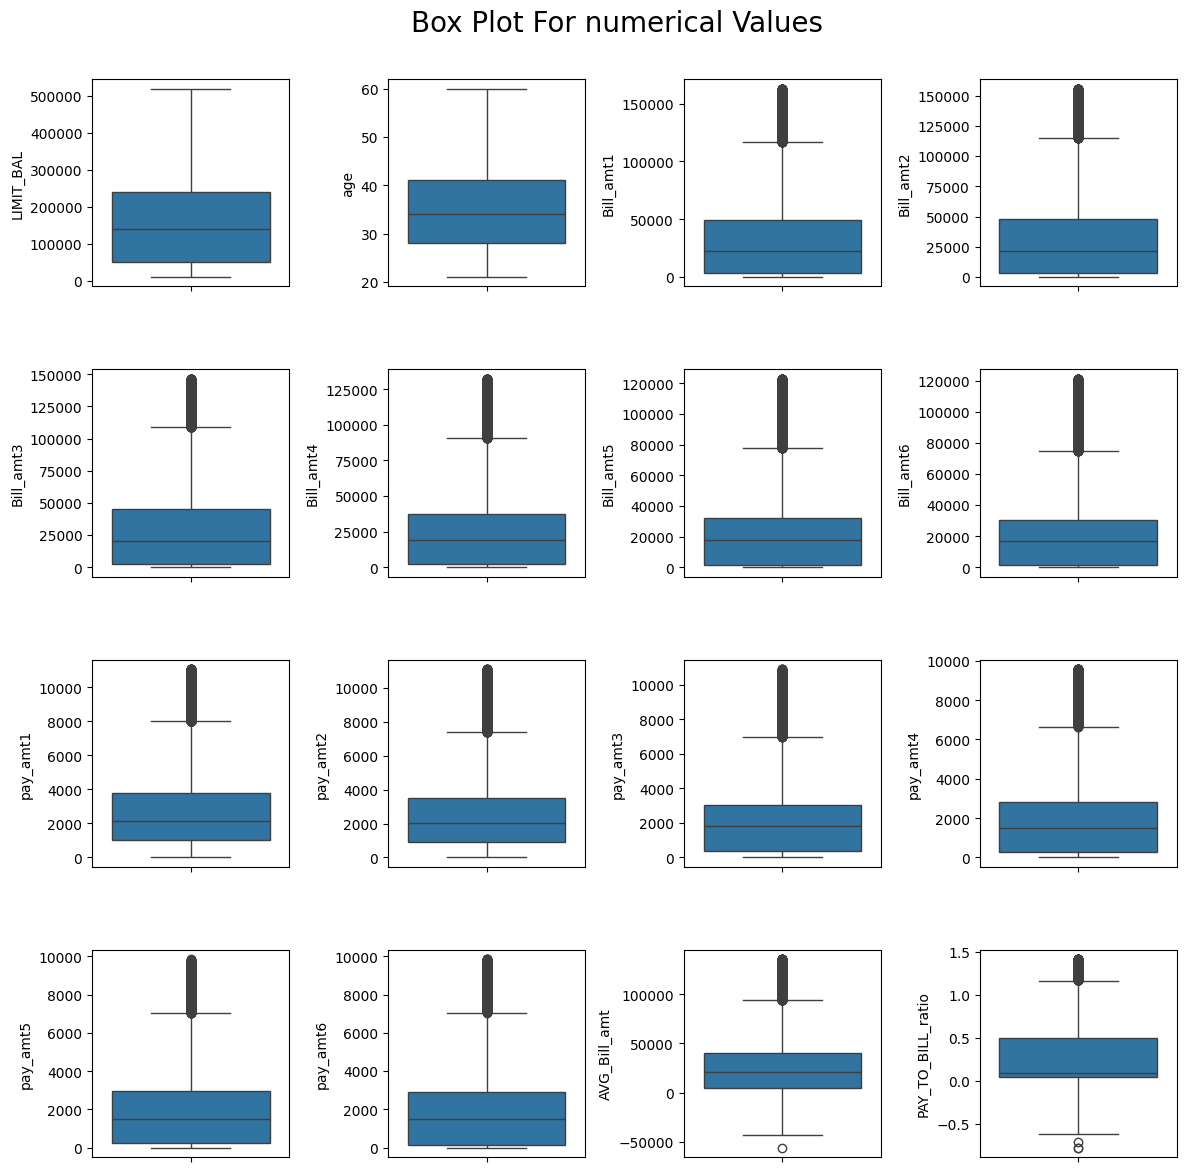

In [472]:
fig, axes=plt.subplots(4, 4, figsize=(14, 14))
axes=axes.flatten()
plt.suptitle('Box Plot For numerical Values', fontsize=20, y=0.93)
for i, col in enumerate(numerical):
    box=sns.boxplot(new_df[col], ax=axes[i])
plt.subplots_adjust(hspace=0.4, wspace=0.5)

In [473]:
for column in numerical:
    column_data = new_df[column]

    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR


    # calculate median
    median = column_data.median()

    # replace outlier withmedian
    column_data=column_data.clip(lower, upper)
    new_df[column]=column_data

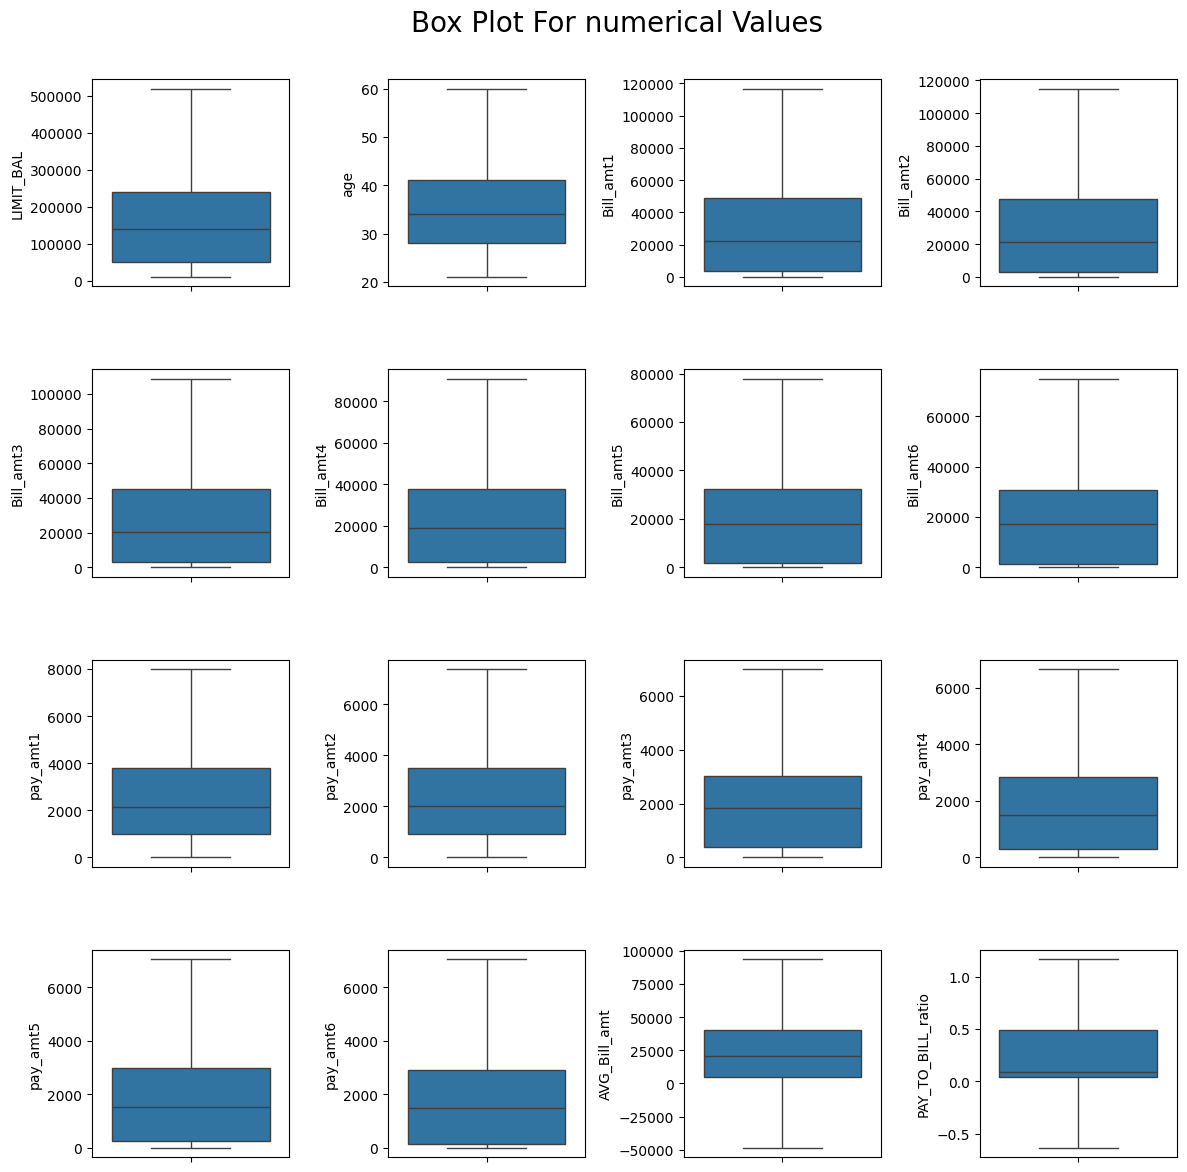

In [474]:
fig, axes=plt.subplots(4, 4, figsize=(14, 14))
axes=axes.flatten()
plt.suptitle('Box Plot For numerical Values', fontsize=20, y=0.93)
for i, col in enumerate(numerical):
    box=sns.boxplot(new_df[col], ax=axes[i])
plt.subplots_adjust(hspace=0.4, wspace=0.5)

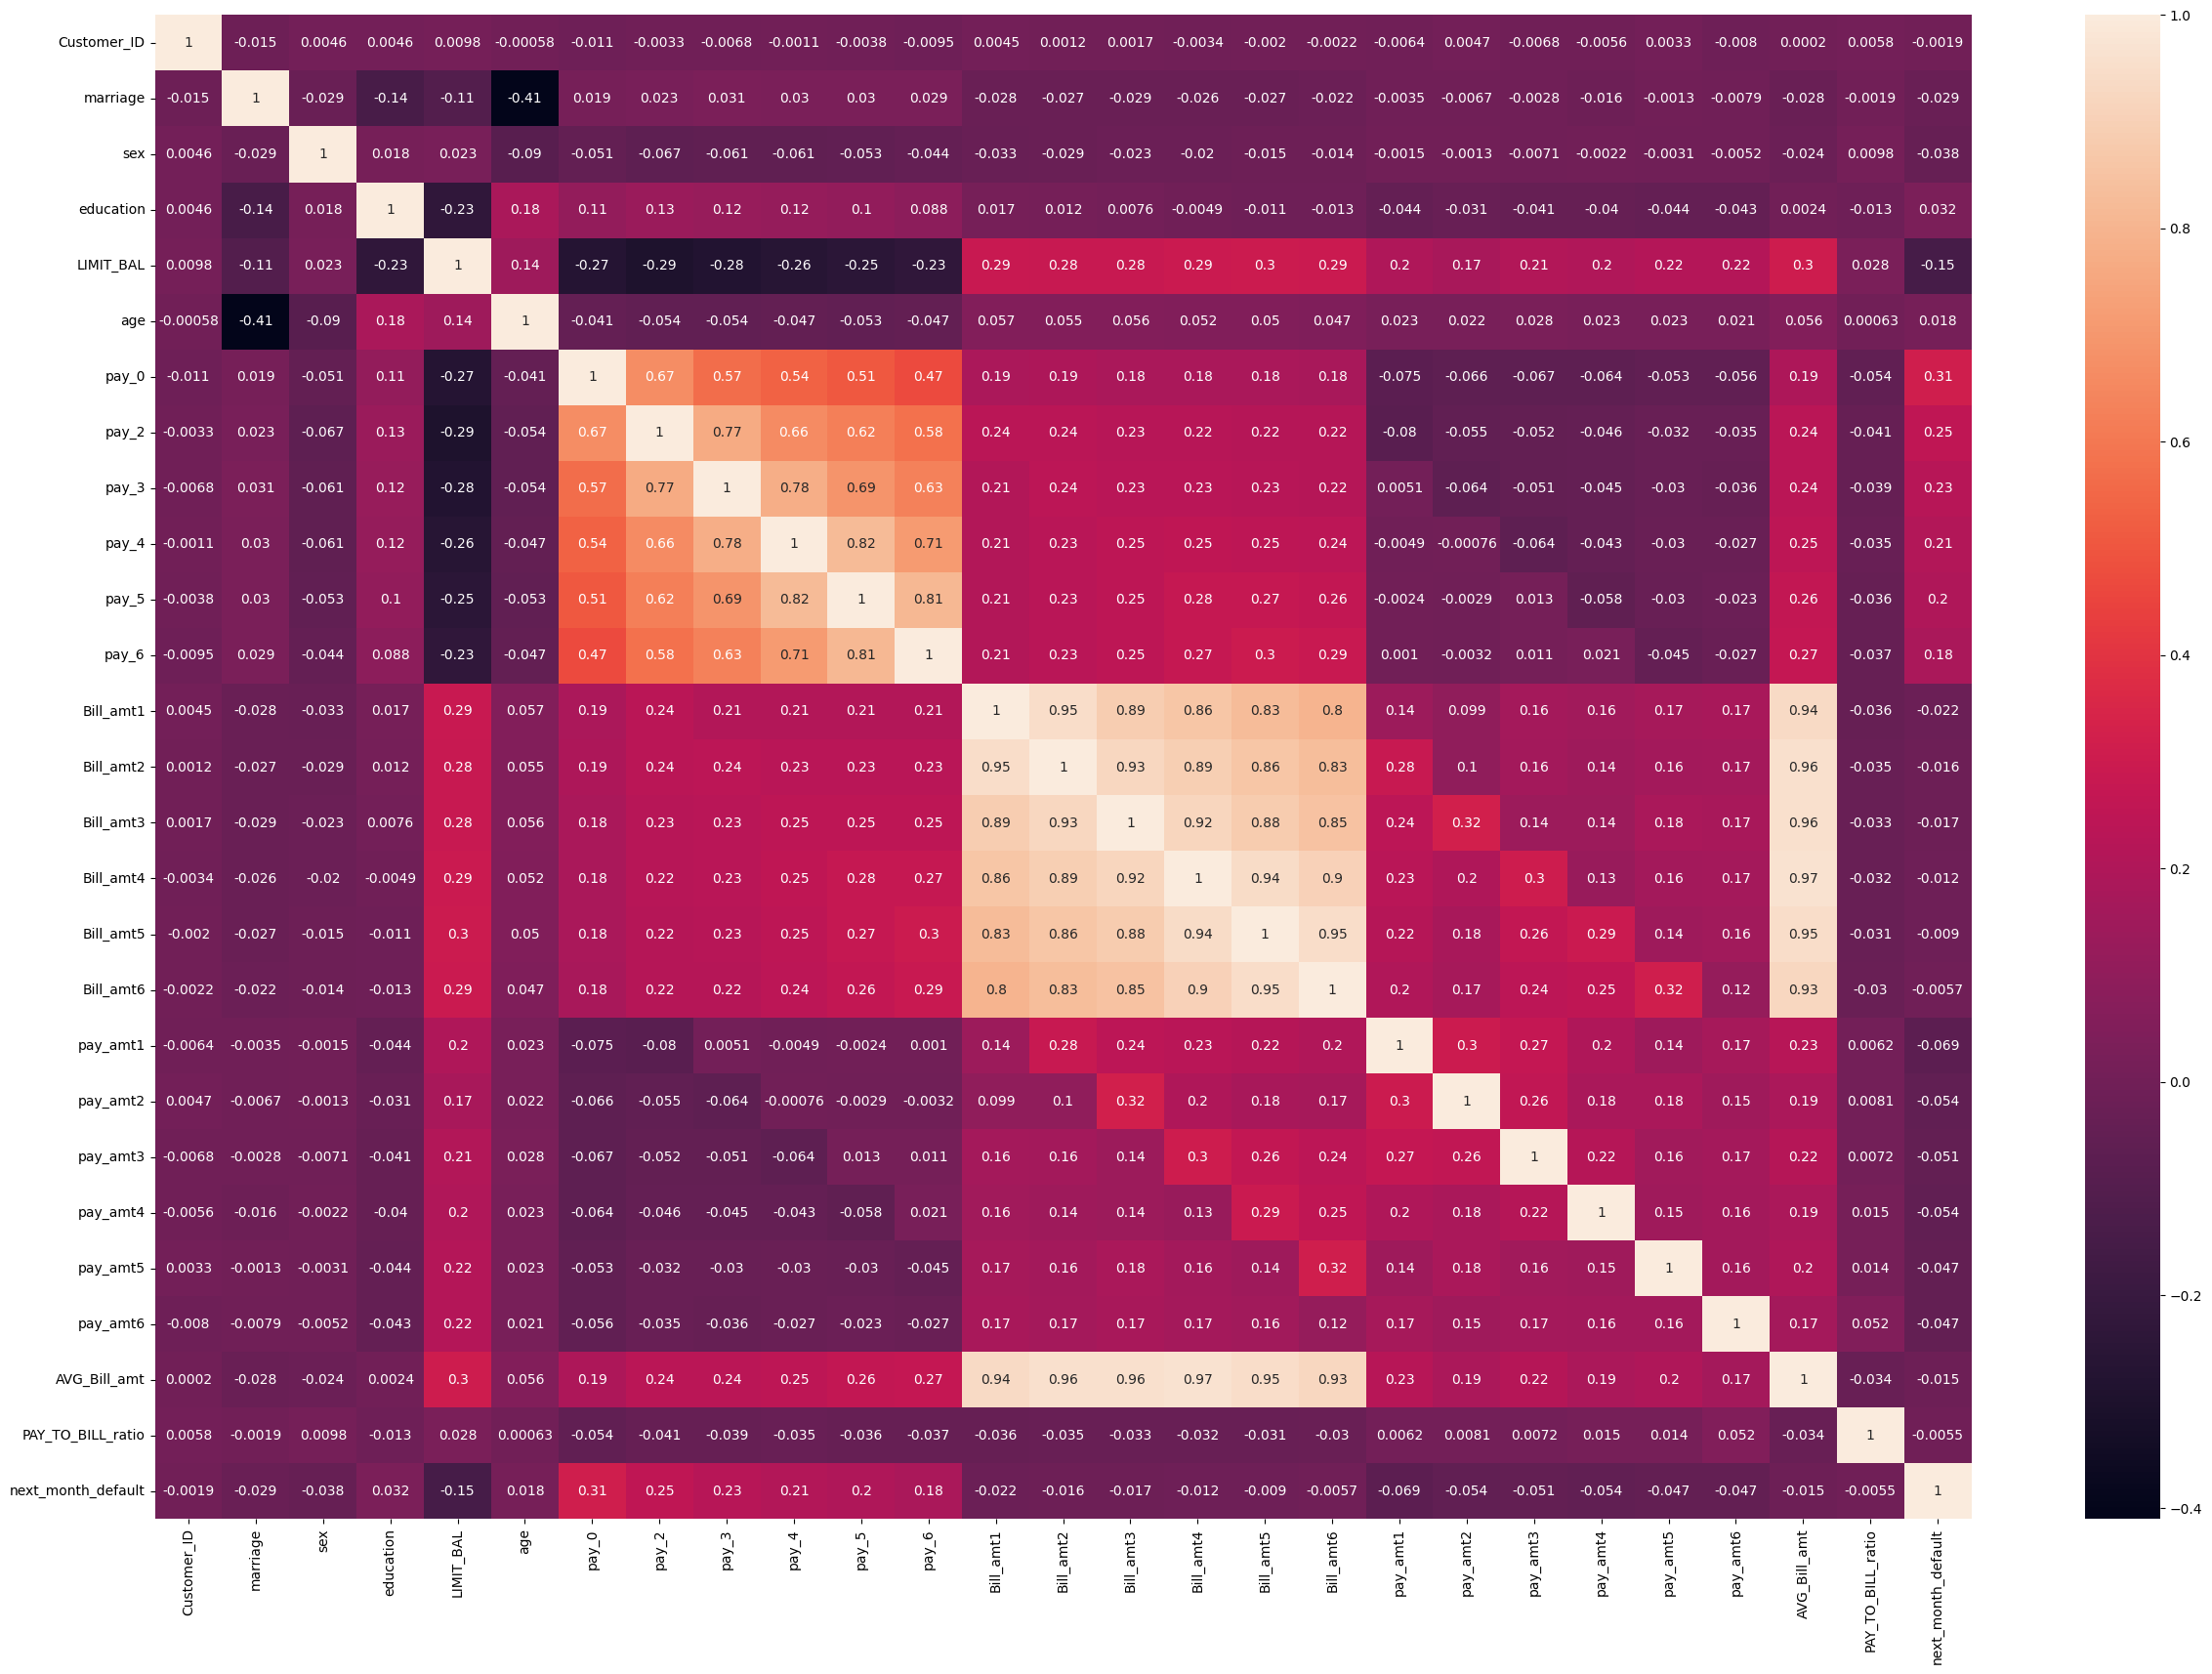

In [475]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [476]:
df.drop(['Customer_ID'], axis=1, inplace=True)
new_df = df.copy()

In [477]:
categorical=['marriage', 'sex', 'education', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'next_month_default']
all_cols=list(df.columns[:])
numerical=[x for x in all_cols if x not in categorical]
df[categorical] = df[categorical].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   marriage            25247 non-null  category
 1   sex                 25247 non-null  category
 2   education           25247 non-null  category
 3   LIMIT_BAL           25247 non-null  int64   
 4   age                 25247 non-null  float64 
 5   pay_0               25247 non-null  category
 6   pay_2               25247 non-null  category
 7   pay_3               25247 non-null  category
 8   pay_4               25247 non-null  category
 9   pay_5               25247 non-null  category
 10  pay_6               25247 non-null  category
 11  Bill_amt1           25247 non-null  float64 
 12  Bill_amt2           25247 non-null  float64 
 13  Bill_amt3           25247 non-null  float64 
 14  Bill_amt4           25247 non-null  float64 
 15  Bill_amt5           25247 non-null  

In [478]:
X = new_df.drop('next_month_default', axis=1)
Y = new_df['next_month_default']

In [479]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

print(f'- Defaulters:\t {len(Y_train[Y_train==1])}')
print(f'- Non-defaulters: {len(Y_train[Y_train==0])}')
print('Test set shape: ', np.shape(X_test))
print(f'- Defaulters:\t {len(Y_test[Y_test==1])}')
print(f'- Non-defaulters: {len(Y_test[Y_test==0])}')

- Defaulters:	 3845
- Non-defaulters: 16352
Test set shape:  (5050, 25)
- Defaulters:	 962
- Non-defaulters: 4088


In [480]:
from sklearn.preprocessing import StandardScaler
##cols_to_standardize = df[["LIMIT_BAL","age","Bill_amt1","Bill_amt2","Bill_amt3","Bill_amt4","Bill_amt5","Bill_amt6","pay_amt1","pay_amt2","pay_amt3","pay_amt4","pay_amt5","pay_amt6","AVG_Bill_amt"]]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [481]:
X_train_scaled.shape

(20197, 25)

In [482]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled,Y_train)

In [483]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_score, recall_score, f1_score, roc_auc_score, auc, ConfusionMatrixDisplay

def evaluate_model(Y_test, Y_pred, Y_prob):


    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall=recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_prob)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
    print("ROC AUC Score:", roc_auc)
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
    ks_stat = tpr - fpr
    ks_cutoff = thresholds[np.argmax(ks_stat)]
    plt.plot(thresholds, tpr, label='True Positive Rate')
    plt.plot(thresholds, fpr, label='False Positive Rate')
    plt.plot(thresholds, ks_stat, label='KS Score')
    plt.axvline(ks_cutoff, linestyle='--', label=f'KS CutOff: {ks_cutoff:.2f}')
    plt.title('KS Chart')
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    plt.legend()
    plt.show()
    #model_result['CutOff']=ks_cutoff
    #fin_result.append(model_result)

In [484]:
dt = DecisionTreeClassifier()

In [485]:
dt.fit(X_train_resampled, Y_train_resampled)

DecisionTreeClassifier()

In [486]:
Y_pred = dt.predict(X_test_scaled)
Y_prob = dt.predict_proba(X_test_scaled)[:, 1]
#rf_pred = rf.predict(X_test)

Accuracy: 0.7326732673267327
Precision: 0.3470031545741325
Recall: 0.4573804573804574
F1 Score: 0.39461883408071746

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      4088
           1       0.35      0.46      0.39       962

    accuracy                           0.73      5050
   macro avg       0.60      0.63      0.61      5050
weighted avg       0.76      0.73      0.75      5050

ROC AUC Score: 0.6274182130346514


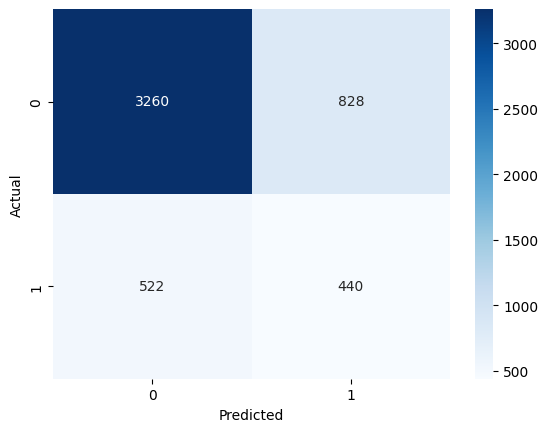

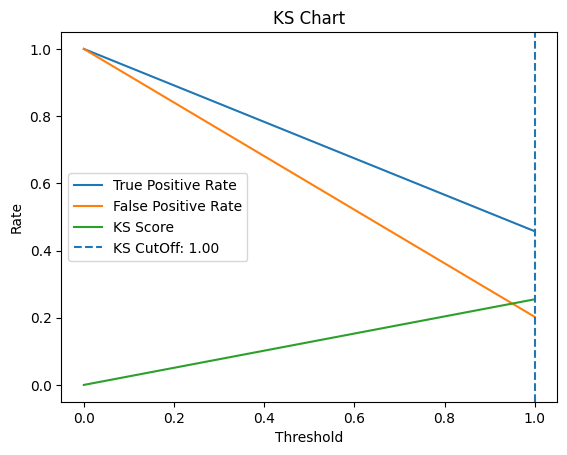

In [487]:
evaluate_model(Y_test, Y_pred,Y_prob)
x1 =classification_report(Y_test, Y_pred)

In [488]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, Y_train_resampled)

RandomForestClassifier()

In [489]:
Y_prob = rf.predict_proba(X_test_scaled)[:, 1]
Y_pred = rf.predict(X_test_scaled)

Accuracy: 0.8192079207920792
Precision: 0.5322793148880105
Recall: 0.41995841995842
F1 Score: 0.4694944799535154

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4088
           1       0.53      0.42      0.47       962

    accuracy                           0.82      5050
   macro avg       0.70      0.67      0.68      5050
weighted avg       0.81      0.82      0.81      5050

ROC AUC Score: 0.7664644454028016


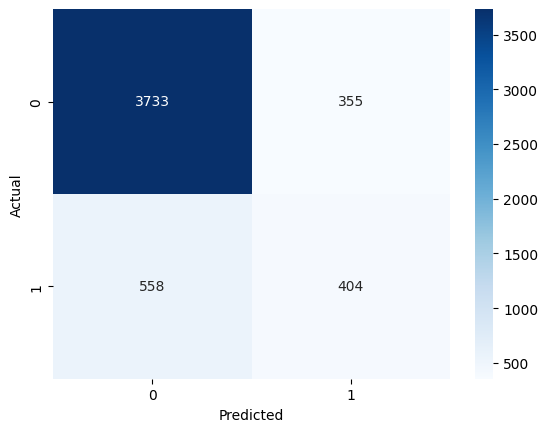

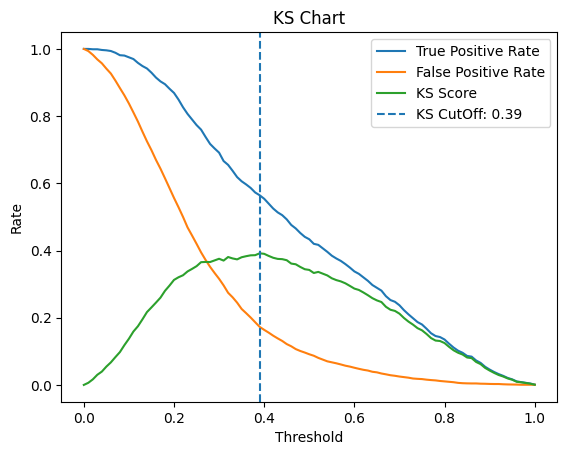

In [490]:
evaluate_model(Y_test, Y_pred , Y_prob)
x2 =classification_report(Y_test, Y_pred)

In [491]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_resampled, Y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [492]:
Y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]
Y_pred = xgb_model.predict(X_test_scaled)

Accuracy: 0.8289108910891089
Precision: 0.5760869565217391
Recall: 0.38565488565488565
F1 Score: 0.46201743462017436

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4088
           1       0.58      0.39      0.46       962

    accuracy                           0.83      5050
   macro avg       0.72      0.66      0.68      5050
weighted avg       0.81      0.83      0.82      5050

ROC AUC Score: 0.7525588304697893


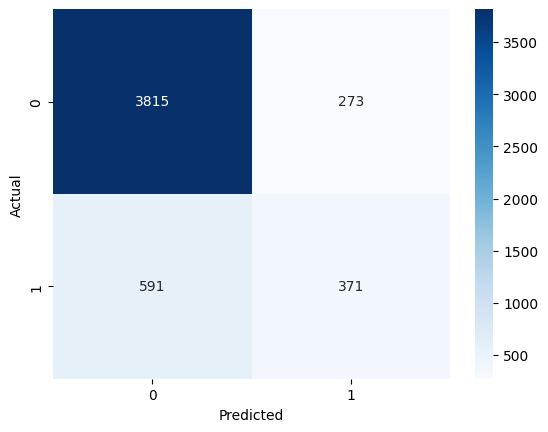

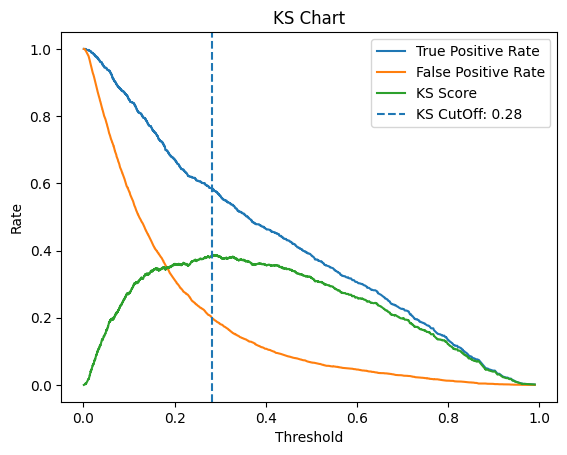

In [493]:
evaluate_model(Y_test, Y_pred , Y_prob)
x3 =classification_report(Y_test, Y_pred)

In [494]:
lr = LogisticRegression()
lr.fit(X_train_resampled, Y_train_resampled)

LogisticRegression()

In [495]:
Y_prob = lr.predict_proba(X_test_scaled)[:, 1]
Y_pred = lr.predict(X_test_scaled)

Accuracy: 0.6732673267326733
Precision: 0.32139148494288683
Recall: 0.6434511434511434
F1 Score: 0.42867036011080334

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77      4088
           1       0.32      0.64      0.43       962

    accuracy                           0.67      5050
   macro avg       0.61      0.66      0.60      5050
weighted avg       0.78      0.67      0.71      5050

ROC AUC Score: 0.7296305601100121


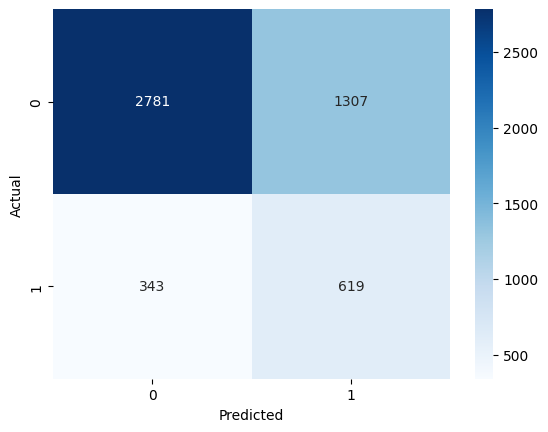

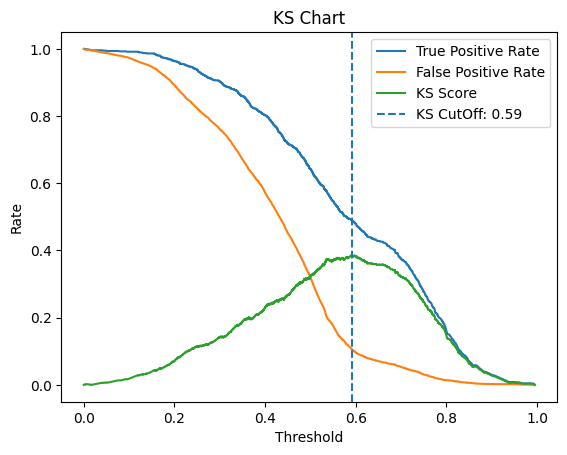

In [496]:
evaluate_model(Y_test, Y_pred , Y_prob)
x4 = classification_report(Y_test, Y_pred)

In [497]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train_resampled, Y_train_resampled)

AdaBoostClassifier()

In [498]:
Y_prob = ada.predict_proba(X_test_scaled)[:, 1]
Y_pred = ada.predict(X_test_scaled)

Accuracy: 0.7768316831683169
Precision: 0.43478260869565216
Recall: 0.5717255717255717
F1 Score: 0.4939380332285586

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      4088
           1       0.43      0.57      0.49       962

    accuracy                           0.78      5050
   macro avg       0.66      0.70      0.68      5050
weighted avg       0.80      0.78      0.79      5050

ROC AUC Score: 0.7504085025489136


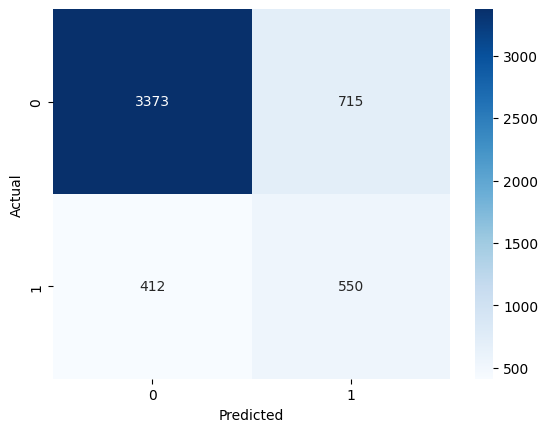

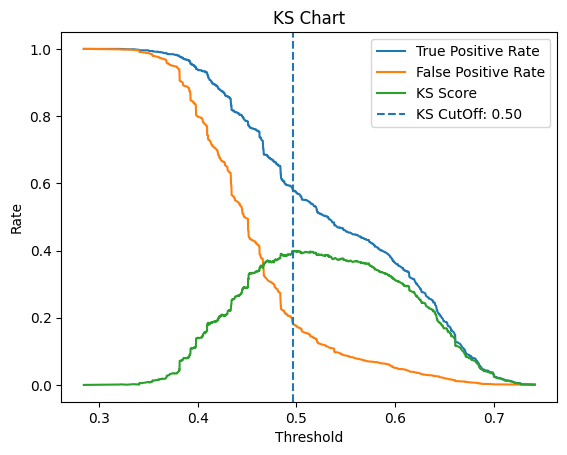

In [499]:
from math import e
evaluate_model(Y_test, Y_pred , Y_prob)
x5 = classification_report(Y_test, Y_pred)

In [500]:
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, Y_train_resampled)

KNeighborsClassifier()

In [501]:
Y_prob = knn.predict_proba(X_test_scaled)[:, 1]
Y_pred = knn.predict(X_test_scaled)

Accuracy: 0.6813861386138614
Precision: 0.3177464788732394
Recall: 0.5862785862785863
F1 Score: 0.412130069419072

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78      4088
           1       0.32      0.59      0.41       962

    accuracy                           0.68      5050
   macro avg       0.60      0.65      0.60      5050
weighted avg       0.77      0.68      0.71      5050

ROC AUC Score: 0.6921377054082534


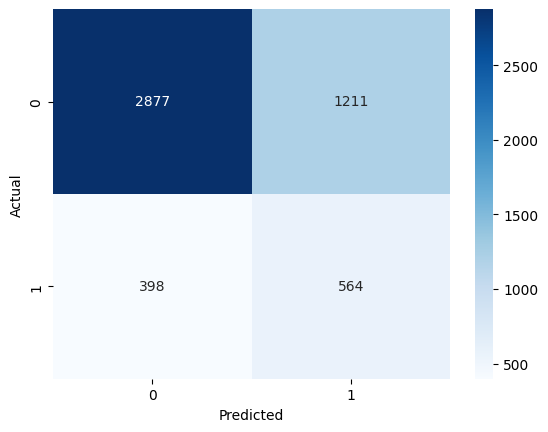

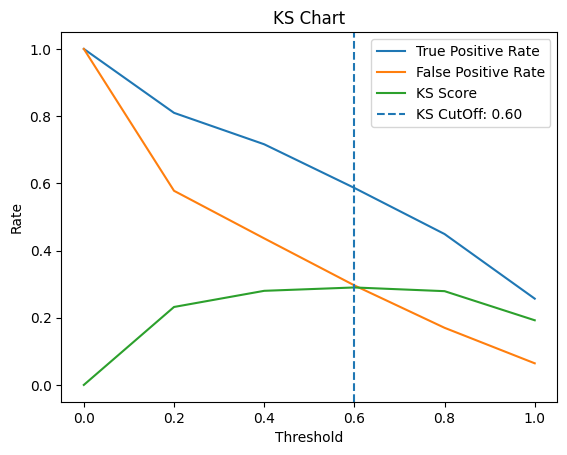

In [502]:
evaluate_model(Y_test, Y_pred , Y_prob)
x6 = classification_report(Y_test, Y_pred)

In [503]:
print( "Summary of all models:")
print("DT",x1)
print("RF",x2)
print("XGB",x3)
print("LR",x4)
print("Ada",x5)
print("KNN",x6)

Summary of all models:
DT               precision    recall  f1-score   support

           0       0.86      0.80      0.83      4088
           1       0.35      0.46      0.39       962

    accuracy                           0.73      5050
   macro avg       0.60      0.63      0.61      5050
weighted avg       0.76      0.73      0.75      5050

RF               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4088
           1       0.53      0.42      0.47       962

    accuracy                           0.82      5050
   macro avg       0.70      0.67      0.68      5050
weighted avg       0.81      0.82      0.81      5050

XGB               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4088
           1       0.58      0.39      0.46       962

    accuracy                           0.83      5050
   macro avg       0.72      0.66      0.68      5050
weighted avg       0.81      0.83      0.

In [504]:
#  Retrain final model
final_model = AdaBoostClassifier()
final_model.fit(X_train_resampled, Y_train_resampled)

AdaBoostClassifier()

In [505]:
val_df = pd.read_csv("/content/validate_dataset_final.csv")
customer_ids = val_df["Customer_ID"]

In [506]:
# Clean categorical variables
val_df["sex"] = val_df["sex"].map({1: 1, 0: 0})
val_df["education"] = val_df["education"].replace({0: 4, 5: 4, 6: 4})
val_df["marriage"] = val_df["marriage"].replace({0: 3})

In [507]:
# Drop ID and align columns
x_val = val_df.drop(columns=["Customer_ID"])

In [508]:
x_val.shape

(5016, 25)

In [509]:
val_df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


In [510]:
# Get predicted probabilities on validation set
val_probs = final_model.predict_proba(x_val)[:, 1]
final_predictions = (val_probs >= 0.5).astype(int)

In [511]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    'Customer_ID': val_df['Customer_ID'],
    'next_month_default': final_predictions
})

# Save to CSV
submission_df.to_csv("submission_22112117.csv", index=False)
print("Saved as 'submission_22112117.csv'")

Saved as 'submission_22112117.csv'


In [512]:
df1=pd.read_csv("/content/submission_22112117.csv")
print(df1['next_month_default'].value_counts())

next_month_default
0    3991
1    1025
Name: count, dtype: int64


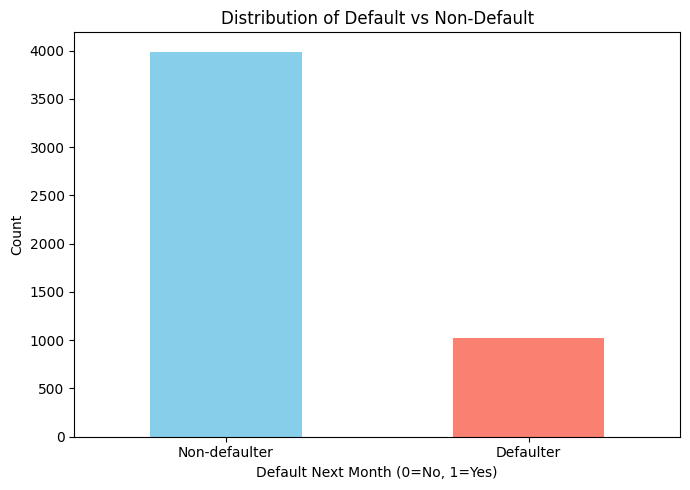

In [513]:
fig, ax = plt.subplots(figsize=(7, 5))
df1['next_month_default'].value_counts().plot(kind='bar',ax=ax,color=['skyblue','salmon'])
ax.set_title('Distribution of Default vs Non-Default')
ax.set_xlabel('Default Next Month (0=No, 1=Yes)')
ax.set_ylabel('Count')
ax.set_xticklabels(['Non-defaulter', 'Defaulter'], rotation=0)

# Display plot
plt.tight_layout()
plt.show()